In [5]:
#Steven Zajac-Descôteaux

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# 1. Tennis Surface Check

Use a linear regression and statsmodels to find which surface type predicts the most points for Federer in the `tennis.csv` dataset.

1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value. 

2. Answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

3. Do a t-test to find that the largest coefficient is statistically significantly different from the second largest (hint: you can run a t-test only with mean values and standard deviations)

In [23]:
tennis = pd.read_csv('data/tennis.csv')
#tennis
#tennis.info()

In [7]:
tennis = pd.read_csv('data/tennis.csv')

tennis = tennis.dropna() #Drop NaN values

X = tennis.surface # Need OHE
X = sm.add_constant(X)


y = tennis['player1 total points won']

#est = sm.OLS(y,X).fit(cov_type='HC2')

#est.summary()
tennis.surface.value_counts()

Outdoor: Hard     425
Outdoor: Clay     216
Indoor: Hard      194
Outdoor: Grass    124
Indoor: Carpet     57
Name: surface, dtype: int64

In [8]:
# 1.1 Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value.
tennis = pd.read_csv('data/tennis.csv')
tennis = tennis.dropna() #Drop NaN values

dummy = pd.get_dummies(tennis.surface,drop_first=True)
dummy = sm.add_constant(dummy)

y = tennis['player1 total points won']

est = sm.OLS(y,dummy).fit(cov_type='HC2')

est.summary()

#P-values for Indoor: Hard, Outdoor: Clay and Outdoor: Hard are  greater than 0.05 and thus we accept the null
#hypothesis in that their relation is not statistically significant.The only p-value less than 0.05 is for Outdoor:
# Grass which would technically mean that Federer would win 15.47 points more on Outdoor Grass for every one point he
# scores on indoor:carpet. But generally speaking surface type might not be the best predictor for whether Federe
# will score more points or not. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     player1 total points won   R-squared:                       0.048
Model:                                  OLS   Adj. R-squared:                  0.044
Method:                       Least Squares   F-statistic:                     16.93
Date:                      Wed, 20 Jan 2021   Prob (F-statistic):           1.91e-13
Time:                              23:41:27   Log-Likelihood:                -4793.2
No. Observations:                      1016   AIC:                             9596.
Df Residuals:                          1011   BIC:                             9621.
Df Model:                                 4                                         
Covariance Type:                        HC2                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             83.2281      3.411     24.403      0.000      76.543      89.913
Indoor: Hard      -6.1456      3.629     -1.693      0.090     -13.259       0.968
Outdoor: Clay      4.8599      3.990      1.218      0.223      -2.961      12.680
Outdoor: Grass    15.4655      4.524      3.419      0.001       6.599      24.332
Outdoor: Hard      4.5908      3.659      1.255      0.210      -2.581      11.762
==============================================================================
Omnibus:                      141.907   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.211
Skew:                           0.915   Prob(JB):                     3.77e-51
Kurtosis:                       4.463   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [9]:
#1.2 Answer the following: should your regression include a constant term? Why or why not?
#How would it change the interpretation of your coefficient and p-value?


#Removing the constant also increases the R-squared to 0.865...however the BIC and AIC get quite large. It can be
# understood that with a low R-squared, that surface type alone is not a very good predictor of wins for Federer and 
# that looking at multiple features would enhance our predictions. But also as per regression standards, we should
# include a constant term. Also without our constant term, our p-values are all below 0.05, which would mean that all
# surface types are statistically significant. However, that being said, our coefs blow up and our results are no 
# longer as accurate. 

In [10]:
#1.3 Do a t-test to find that the largest coefficient is statistically significantly different from the second largest
# (hint: you can run a t-test only with mean values and standard deviations)

#Testing that the slope from one is different from slope of the other.

from scipy.stats import ttest_ind_from_stats

#est.params.sort_values(ascending=False).iloc[1:3] Get highest coef. Not constant 

mean1 = est.params.loc['Outdoor: Grass']  #Coef 
std1 = est.bse.loc['Outdoor: Grass'] #Std error
nobs1 = len(tennis) #Len of observations

mean2 = est.params.loc['Outdoor: Clay']
std2 = est.bse.loc['Outdoor: Clay']
nobs2 = len(tennis)

ttest_ind_from_stats(mean1,std1,nobs1,
                     mean2, std2, nobs2) #if > 0.05, shows independence

#With a p-value of 0, which is less than 0.05, it means that they are statistically different 
# We thus reject the null hypothesis. 

Ttest_indResult(statistic=56.04147570257512, pvalue=0.0)

# 2. Titanic prediction contest

Use whatever tricks you can to best model whether a passenger would survive the titanic disaster (using linear regression).

1. Use non-regularized regression to build the best model you can. Show 2 alternate model speficications and explain why you chose the one you did

2. Interpret the coefficients in your model. Which attributes best relate to survival probability? How does this relate to socio-economic characteristics and "real-world" interpretation?

3. Use regularized regression to build a purely predictive model. Can you improve your accuracy? Plot the regularized model against the interpretable model predictions in a regression plot to make your case.

In [11]:
#NOTES FOR ME :), ANSWERS BELOW

"""#Model 1
titanic = sns.load_dataset('titanic')
#titanic.info()

#Drop values are missing for most or duplicates. 
titanic.drop(['deck','class','alive','embark_town','who'],axis=1,inplace=True) 

titanic.dropna(inplace=True) #Drop NaN AFTER dropping deck because lots of deck missing
titanic.reset_index(inplace=True,drop=True)#Reset and drop old index

#Get dummies for sex and droo
titanic['male'] = pd.get_dummies(titanic['sex'],drop_first=True)
titanic[['class_2','class_3']] = pd.get_dummies(titanic['pclass'],drop_first=True)
titanic[['embarked_Q','embarked_S']] = pd.get_dummies(titanic['embarked'],drop_first=True)

#Normalize

max_age = titanic.age.max() 
titanic.age = titanic.age/max_age

max_fare = titanic.fare.max()
titanic.fare = titanic.fare/max_fare

#poly
titanic['age_sq'] = titanic.age.apply(np.sqrt)
titanic['age_cb'] = titanic.age.pow(3)



titanic['fare_sq'] = titanic.fare.apply(np.sqrt)
titanic['fare_cb'] = titanic.fare.pow(3)

#Drop emabrked
titanic.drop(['embarked','sex','pclass'],inplace=True,axis=1)

#Convert bool to int (binary)
titanic.alone = titanic.alone.astype(int)
titanic.adult_male = titanic.adult_male.astype(int)

y = titanic.survived 

X = titanic.drop(['survived','fare_sq','fare','male','age','age_cb','embarked_S','embarked_Q'],axis=1)
X = sm.add_constant(X)

est = sm.OLS(y,X).fit(cov_type='HC2')

est.summary()"""

"#Model 1\ntitanic = sns.load_dataset('titanic')\n#titanic.info()\n\n#Drop values are missing for most or duplicates. \ntitanic.drop(['deck','class','alive','embark_town','who'],axis=1,inplace=True) \n\ntitanic.dropna(inplace=True) #Drop NaN AFTER dropping deck because lots of deck missing\ntitanic.reset_index(inplace=True,drop=True)#Reset and drop old index\n\n#Get dummies for sex and droo\ntitanic['male'] = pd.get_dummies(titanic['sex'],drop_first=True)\ntitanic[['class_2','class_3']] = pd.get_dummies(titanic['pclass'],drop_first=True)\ntitanic[['embarked_Q','embarked_S']] = pd.get_dummies(titanic['embarked'],drop_first=True)\n\n#Normalize\n\nmax_age = titanic.age.max() \ntitanic.age = titanic.age/max_age\n\nmax_fare = titanic.fare.max()\ntitanic.fare = titanic.fare/max_fare\n\n#poly\ntitanic['age_sq'] = titanic.age.apply(np.sqrt)\ntitanic['age_cb'] = titanic.age.pow(3)\n\n\n\ntitanic['fare_sq'] = titanic.fare.apply(np.sqrt)\ntitanic['fare_cb'] = titanic.fare.pow(3)\n\n#Drop emabrked

In [12]:
#2.1 Use non-regularized regression to build the best model you can. Show 2 alternate model speficications
# and explain why you chose the one you did

#The best model I found was the model #3. The reason for that is that, like in model 2, age and fare has been 
# normalized to closer resemble the rest of the data and to be between 0 and 1. Then also we removed the fare, sex,
# embarked_S, embarked_Q features which are not statistically significant.The R-squared goes doesn, HOWEVER, the 
# adjusted R-squared stays the same throughout the models. Also I dropped Alive because same as Survived, Embark_town
# because same as Embarked and Who because same as Sex. Also dropped Deck because majority of values are NaN


# 2.2 Interpret the coefficients in your model. Which attributes best relate to survival probability?
# How does this relate to socio-economic characteristics and "real-world" interpretation?

#From looking at model 3, it becomes clear that as you go down the class ranks, survivability goes down if we look
# at each of the coefs. -0.1631 from first class to second and -0.3186 first to third. That's  if all other 
# values remain constant. Also people who were alone has a decreased chance of survivability if all other
# values remained constant. The model also indicated that for every one increa in age, a passenger has a -0.2817 
# impact on their survivability. Also adult_males in general seemed to have the biggest change in survivability
# while other features stayed the same. Indicating that the general trend that adult males were the ones being less
# likely to survive. Also for age, something that changes once we categorize age (below) with the idea that younger 
# and the elderly were giving priority boarding on life boats and thus had a higher chance of survival. This can 
# relate to curren socio-economic real-world problems in that individuals who are well off tend to have better access
#to tools (lifeboats) to survive when compared to individuals who are considered to be of lower socio-economic status

#titanic = sns.load_dataset('titanic')
#titanic

In [13]:
#Model 1
titanic = sns.load_dataset('titanic')
#titanic.info()

#Drop values are missing for most or duplicates. 
titanic.drop(['deck','class','alive','embark_town','who'],axis=1,inplace=True) 

titanic.dropna(inplace=True) #Drop NaN AFTER dropping deck because lots of deck missing
titanic.reset_index(inplace=True,drop=True)#Reset and drop old index

#Get dummies for sex and droo
titanic['male'] = pd.get_dummies(titanic['sex'],drop_first=True)
titanic[['class_2','class_3']] = pd.get_dummies(titanic['pclass'],drop_first=True)
titanic[['embarked_Q','embarked_S']] = pd.get_dummies(titanic['embarked'],drop_first=True)

#Drop emabrked
titanic.drop(['embarked','sex','pclass'],inplace=True,axis=1)

#Convert bool to int (binary)
titanic.alone = titanic.alone.astype(int)
titanic.adult_male = titanic.adult_male.astype(int)

y = titanic.survived 

X = titanic.drop('survived',axis=1)
X = sm.add_constant(X)

est = sm.OLS(y,X).fit(cov_type='HC2')

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     87.54
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          1.45e-123
Time:                        23:41:30   Log-Likelihood:                -293.74
No. Observations:                 712   AIC:                             611.5
Df Residuals:                     700   BIC:                             666.3
Df Model:                          11                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1999      0.067     17.820      0.000       1.068       1.332
age           -0.0033      0.001     -2.902      0.004      -0.006      -0.001
sibsp         -0.1216      0.020     -5.972      0.000      -0.161      -0.082
parch         -0.0568      0.022     -2.602      0.009      -0.100      -0.014
fare           0.0004      0.000      1.058      0.290      -0.000       0.001
adult_male    -0.5450      0.073     -7.510      0.000      -0.687      -0.403
alone         -0.1030      0.043     -2.387      0.017      -0.188      -0.018
male          -0.0090      0.068     -0.131      0.896      -0.143       0.125
class_2       -0.1631      0.047     -3.478      0.001      -0.255      -0.071
class_3       -0.3186      0.052     -6.101      0.000      -0.421      -0.216
embarked_Q    -0.1201      0.081     -1.486      0.137      -0.278       0.038
embarked_S    -0.0494      0.042     -1.187      0.235      -0.131       0.032
==============================================================================
Omnibus:                       34.297   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.481
Skew:                           0.524   Prob(JB):                     4.40e-09
Kurtosis:                       3.446   Cond. No.                         498.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [14]:
#Model 2

#Normalize continuous (age, fare) because rest of df is basically 1 or 0
max_age = titanic.age.max() 
titanic.age = titanic.age/max_age

max_fare = titanic.fare.max()
titanic.fare = titanic.fare/max_fare

y = titanic.survived 

X = titanic.drop('survived',axis=1)
X = sm.add_constant(X)

est = sm.OLS(y,X).fit(cov_type='HC2')

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     87.54
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          1.45e-123
Time:                        23:41:30   Log-Likelihood:                -293.74
No. Observations:                 712   AIC:                             611.5
Df Residuals:                     700   BIC:                             666.3
Df Model:                          11                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1999      0.067     17.820      0.000       1.068       1.332
age           -0.2669      0.092     -2.902      0.004      -0.447      -0.087
sibsp         -0.1216      0.020     -5.972      0.000      -0.161      -0.082
parch         -0.0568      0.022     -2.602      0.009      -0.100      -0.014
fare           0.1794      0.170      1.058      0.290      -0.153       0.512
adult_male    -0.5450      0.073     -7.510      0.000      -0.687      -0.403
alone         -0.1030      0.043     -2.387      0.017      -0.188      -0.018
male          -0.0090      0.068     -0.131      0.896      -0.143       0.125
class_2       -0.1631      0.047     -3.478      0.001      -0.255      -0.071
class_3       -0.3186      0.052     -6.101      0.000      -0.421      -0.216
embarked_Q    -0.1201      0.081     -1.486      0.137      -0.278       0.038
embarked_S    -0.0494      0.042     -1.187      0.235      -0.131       0.032
==============================================================================
Omnibus:                       34.297   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.481
Skew:                           0.524   Prob(JB):                     4.40e-09
Kurtosis:                       3.446   Cond. No.                         26.4
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [15]:
#Model 3

y = titanic.survived 

#Drop high p-values
X = titanic.drop(['survived','embarked_Q','embarked_S','fare','male'],axis=1)
X = sm.add_constant(X)

est = sm.OLS(y,X).fit(cov_type='HC2')

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     134.1
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          5.16e-125
Time:                        23:41:31   Log-Likelihood:                -295.88
No. Observations:                 712   AIC:                             607.8
Df Residuals:                     704   BIC:                             644.3
Df Model:                           7                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2154      0.054     22.462      0.000       1.109       1.321
age           -0.2847      0.086     -3.296      0.001      -0.454      -0.115
sibsp         -0.1261      0.019     -6.728      0.000      -0.163      -0.089
parch         -0.0554      0.021     -2.602      0.009      -0.097      -0.014
adult_male    -0.5534      0.034    -16.222      0.000      -0.620      -0.487
alone         -0.1149      0.043     -2.688      0.007      -0.199      -0.031
class_2       -0.2033      0.038     -5.342      0.000      -0.278      -0.129
class_3       -0.3638      0.042     -8.737      0.000      -0.445      -0.282
==============================================================================
Omnibus:                       33.860   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.896
Skew:                           0.521   Prob(JB):                     5.90e-09
Kurtosis:                       3.438   Cond. No.                         12.3
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

<ipython-input-16-b8e01b66a138>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['kid'][titanic['age'] < 7] = 1 #Assign
<ipython-input-16-b8e01b66a138>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['elder'][titanic['age'] >= 43] = 1


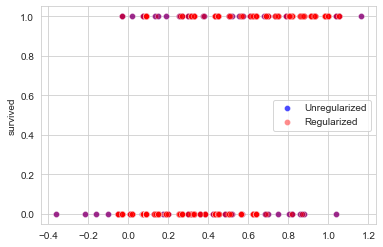

(0.44827498782656927,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:               survived   R-squared:                       0.448
 Model:                            OLS   Adj. R-squared:                  0.443
 Method:                 Least Squares   F-statistic:                     136.5
 Date:                Wed, 20 Jan 2021   Prob (F-statistic):          1.57e-126
 Time:                        23:41:32   Log-Likelihood:                -291.82
 No. Observations:                 712   AIC:                             599.6
 Df Residuals:                     704   BIC:                             636.2
 Df Model:                           7                                         
 Covariance Type:                  HC2                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 -----------------------------------------------

In [16]:
# 2.3 Use regularized regression to build a purely predictive model. Can you improve your accuracy?
#Plot the regularized model against the interpretable model predictions in a regression plot to make your case.


#Ridge regression helps the model a little bit but not much. I was able to improve my accuracy by categorizing age 
# into three groups, children, elderly, active adults. Children younger than 7 and adults aged 43 and older are
# the 'elderly' and the rest are dopped. This helps the model have a better fit with an adjusted R-squared of .443.
# also when looking at ridge vs lasso there's not much change that's happening but ridge has a slightly higher score. 
# .448 non adjusted R-squared even compared to elastic net. 
from sklearn.metrics import r2_score

titanic = sns.load_dataset('titanic')#.copy()

titanic.drop(['deck','class','alive','embark_town','who'],axis=1,inplace=True) 

titanic.dropna(inplace=True)
titanic.reset_index(inplace=True,drop=True)

#Keep second line of sex
titanic['sex'] = pd.get_dummies(titanic['sex'],drop_first=True)
titanic[['embarked_Q','embarked_S']] = pd.get_dummies(titanic['embarked'],drop_first=True)#rename new cols
titanic.drop('embarked',inplace=True,axis=1)#Drop redundancy
titanic.alone = titanic.alone.astype(int)# Bool convert to int 0/1
titanic.adult_male = titanic.adult_male.astype(int)


#Set age group categories. Adjust to make age group better fitting
#Normalize: bc most df is between 0,1 age and fare would blow up compared to rest & received v small coefs
titanic['kid'] = 0 #Create a col of 0
titanic['kid'][titanic['age'] < 7] = 1 #Assign
titanic['elder'] = 0 
titanic['elder'][titanic['age'] >= 43] = 1 

#max_fare = titanic.fare.max()
#titanic.fare = titanic.fare/max_fare

#Drop cols that with high p values
titanic.drop(['age','embarked_Q','embarked_S','fare','sex'],axis=1,inplace=True)

#set
y = titanic.survived

X = titanic.drop('survived',axis=1)
X = sm.add_constant(X)

est = sm.OLS(y,X).fit(cov_type='HC2')
est_ridge = sm.OLS(y,X).fit_regularized(L1_wt=0) #L1_wt 0: ridge fit, 1: lasso fit, or method='elastic_net'

y_hat = est.predict(X) #predict without ridge
y_hat_ridge = est_ridge.predict(X) #Predict X values with ridge


#Plot the regularized vs unregularized models 
sns.set_style("whitegrid")
sns.scatterplot(x=y_hat,y=y,color='blue',alpha=.7,label='Unregularized')
#Can also set x to est.fittedvalues? or est_ridge.fittedvalues...
sns.scatterplot(x=y_hat_ridge,y=y,color='red',alpha=.45,label='Regularized')
plt.show()

r2_score(y,y_hat_ridge),est.summary()

# House Price prediction

Using the techniques you learned, use everything you can to build the best **interpretable** (eg. non-regularized) regression model on the `house_price.csv` dataset. You also have `house_price_data_description.txt` to help -- full description of each column.

Here's a brief version of what you'll find in the data description file.

**SalePrice** - the property's sale price in dollars. **This is the target variable that you're trying to predict.**

Here are the features you can use (or engineer into new features!) for your `X` matrix:

    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


In [17]:
#txt = open('data/house_price_data_description.txt','r')
#print(txt.read())

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

#Did this 3 ways. Manual drop, RFE, and Recursive. 

In [19]:
###BEST FOR ALL P-VALUES ARE AT LEAST BELOW 0.05 BUT REST NUMBERS ARE AWFUL


from sklearn.feature_selection import RFE
houses = pd.read_csv('data/house_price.csv')

#houses.info()
#houses.isnull().sum()
#houses.SalePrice.describe()

houses = houses.drop([1298]) #Drop outlier. Large home, new but selling at lower price. Seems not fitting

#Drop cols where most values are missing or of little value

houses = houses.drop('OverallCond',axis=1)


#Drop cols where more than 50% of the data is missing. 
lots_missing = []

for col in houses.columns:
    if (len(houses) - houses[col].count()) > (.5 * len(houses)):
        lots_missing.append(col) #if more than 50% of data is missing, just drop

houses = houses.drop(lots_missing,axis=1)

#Separate Columns by data type

#Numberical and string variables
numeric_cols = [] #Interval
string_cols = [] #Ordinal and categorical will be split later
nominal_cols = [] #Nominal 
#Ordinal
ord_cols = ["ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure",
            "BsmtFinType1","BsmtFinType2","HeatingQC","Electrical","KitchenQual",
            "Functional","FireplaceQu","GarageQual","GarageCond","PoolQC","Fence"]

for col in houses.columns:
    #True integer or float columns. Continuous, interval data
    if (houses.dtypes[col]==np.int64 or houses.dtypes[col]==np.int32 or houses.dtypes[col]==np.float64):
        numeric_cols.append(col)
    #Nominal and ordinal cols
    if (houses.dtypes[col]==np.object):
        string_cols.append(col)
        
y = houses.SalePrice

X = houses.drop('SalePrice',axis=1)

#Split nominal and ordinal columns
string_data = X[string_cols]

for col in string_data:
    if col not in ord_cols: #If string data but nor ordinal then must be nominal
        nominal_cols.append(col)
        
numeric_cols.remove('SalePrice') #Remove SalePrice from Numeric cols

#Fill NaNs from validation and training set
houses = houses.fillna(houses.mode().iloc[0])

#Categorical columns
houses_string = houses.select_dtypes(include=object) #select object type
houses_nums = houses.select_dtypes(include=np.number) #select numbers
houses_cats = houses_string.astype('category') #Convert strings to categories
houses = houses_nums.join(houses_cats)

#Dummy-encode nominal and ordinal variables
houses.drop(['Foundation','Heating','LotShape','MiscVal','HeatingQC','BsmtFullBath','BsmtHalfBath',
             'HalfBath','MoSold'],inplace=True,axis=1)

houses_dummies = pd.get_dummies(houses,drop_first=True)

#Make sure to use house_dummies here
#Also I know there is a way to do this maybe through recursion but I did not have the time to make a function
# and did it manually lol
drop = ['SalePrice','Id','Electrical_FuseP','Condition2_Norm','SaleCondition_Partial','GarageYrBlt',
        'Neighborhood_Blueste','SaleType_WD','RoofStyle_Gable','Condition2_Feedr','Exterior2nd_Stone',
        'Exterior1st_BrkFace','FireplaceQu_TA','Condition1_RRNe','BldgType_2fmCon','Neighborhood_Somerst',
        'Electrical_FuseF','BsmtFinType2_GLQ','Neighborhood_BrDale','FireplaceQu_Gd','RoofMatl_Tar&Grv',
        'RoofStyle_Hip','GarageFinish_Unf','SaleCondition_AdjLand','SaleType_Oth','SaleCondition_Alloca',
        'FireplaceQu_Po','BsmtFinType1_BLQ','EnclosedPorch','RoofMatl_WdShake','Neighborhood_BrkSide',
        'Exterior2nd_Other','SaleCondition_Family','RoofStyle_Gambrel','SaleType_ConLw','YrSold','SaleType_ConLI',
        'BsmtFinSF2','PavedDrive_Y','Condition1_PosA','Condition1_RRNn','Functional_Maj2','ExterQual_Fa',
        'Neighborhood_SWISU','Neighborhood_SawyerW','Neighborhood_MeadowV','HouseStyle_SFoyer','HouseStyle_SLvl',
        'Exterior2nd_CmentBd','Exterior1st_CemntBd','OpenPorchSF','SaleType_CWD','Electrical_SBrkr','BsmtFinType1_Unf',
        'LotConfig_FR3','LotConfig_Inside','Functional_Mod','BsmtUnfSF','Neighborhood_IDOTRR','TotRmsAbvGrd',
        'Exterior1st_Stucco','Exterior2nd_Stucco','Exterior1st_BrkComm','Exterior2nd_Brk Cmn','Exterior2nd_AsphShn',
        'LotFrontage','Exterior1st_AsphShn','LandSlope_Mod','LandContour_Low','GarageArea','HouseStyle_2.5Fin',
        'HouseStyle_2.5Unf','HouseStyle_2Story','Condition1_RRAn','Condition1_PosN','Condition1_Feedr',
        'Condition2_RRAn','Exterior2nd_Wd Shng','PavedDrive_P','Functional_Min1','Condition2_PosN','RoofMatl_Roll',
        'BedroomAbvGr','BsmtFinType1_Rec','Functional_Min2','BsmtExposure_Mn','HouseStyle_1Story','CentralAir_Y',
        'Neighborhood_ClearCr','Exterior1st_MetalSd','Exterior2nd_MetalSd','SaleType_Con','FullBath','Electrical_Mix',
        'BsmtCond_Po','MasVnrArea','Neighborhood_Timber','RoofMatl_WdShngl','Neighborhood_CollgCr','Exterior1st_WdShing',
        'Exterior2nd_ImStucc','Exterior2nd_Plywood','Exterior1st_Stone','BldgType_Duplex','PoolArea',
        'Exterior1st_VinylSd','Exterior2nd_VinylSd','Exterior2nd_HdBoard','RoofStyle_Mansard','ExterCond_Gd',
        'ExterCond_TA','ExterCond_Fa','ExterCond_Po','FireplaceQu_Fa','BsmtFinType1_GLQ','Fireplaces',
        'Neighborhood_Gilbert','BldgType_TwnhsE','Neighborhood_Sawyer','BldgType_Twnhs','GarageFinish_RFn',
        'LandContour_HLS','LandContour_Lvl','Neighborhood_NWAmes','3SsnPorch','GarageType_Basment',
        'GarageType_BuiltIn','GarageType_Attchd','GarageType_CarPort','GarageType_Detchd','Exterior2nd_Wd Sdng',
        'Exterior2nd_BrkFace']

X = houses_dummies.drop(drop,axis=1)
X = sm.add_constant(X)

y = houses_dummies.SalePrice

est = sm.OLS(y,X).fit(cov_type='HC2')

variables = pd.DataFrame(est.pvalues.sort_values(ascending=False))
variables.drop('const',inplace=True)
variables

est.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 82, but rank is 73
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 3.071e+08
Date:                Wed, 20 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:41:33   Log-Likelihood:                -16809.
No. Observations:                1459   AIC:                         3.378e+04
Df Residuals:                    1378   BIC:                         3.421e+04
Df Model:                          80                                         
Covariance Type:                  HC2                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -6.933e+05   1.33e+05     -5.221      0.000   -9.54e+05   -4.33e+05
MSSubClass            -155.4807     24.357     -6.383      0.000    -203.220    -107.741
LotArea                  0.7062      0.127      5.578      0.000       0.458       0.954
OverallQual           7402.4739   1000.847      7.396      0.000    5440.849    9364.099
YearBuilt              144.0919     58.184      2.476      0.013      30.054     258.130
YearRemodAdd           208.7455     35.687      5.849      0.000     138.800     278.691
BsmtFinSF1              18.9172      3.092      6.118      0.000      12.856      24.978
TotalBsmtSF              9.8845      3.442      2.872      0.004       3.139      16.630
1stFlrSF                29.4498      5.874      5.014      0.000      17.937      40.963
2ndFlrSF                30.1697      5.239      5.759      0.000      19.902      40.438
LowQualFinSF           -31.1348     12.077     -2.578      0.010     -54.806      -7.464
GrLivArea               28.4848      4.329      6.580      0.000      20.001      36.969
KitchenAbvGr         -1.253e+04   4978.726     -2.517      0.012   -2.23e+04   -2775.432
GarageCars            6632.7683   1335.168      4.968      0.000    4015.887    9249.650
WoodDeckSF              18.1908      6.225      2.922      0.003       5.990      30.392
ScreenPorch             37.1801     15.128      2.458      0.014       7.530      66.830
MSZoning_FV            4.81e+04   8326.116      5.778      0.000    3.18e+04    6.44e+04
MSZoning_RH           2.672e+04   9459.619      2.825      0.005    8181.614    4.53e+04
MSZoning_RL           3.312e+04   7373.701      4.491      0.000    1.87e+04    4.76e+04
MSZoning_RM           2.852e+04   7014.961      4.066      0.000    1.48e+04    4.23e+04
Street_Pave           3.452e+04   1.33e+04      2.593      0.010    8431.583    6.06e+04
Utilities_NoSeWa     -2.884e+04   8259.023     -3.492      0.000    -4.5e+04   -1.27e+04
LotConfig_CulDSac     9333.7155   3241.068      2.880      0.004    2981.339    1.57e+04
LotConfig_FR2        -7480.2170   2697.256     -2.773      0.006   -1.28e+04   -2193.693
LandSlope_Sev        -4.431e+04    1.6e+04     -2.776      0.006   -7.56e+04    -1.3e+04
Neighborhood_Crawfor  2.368e+04   4803.790      4.929      0.000    1.43e+04    3.31e+04
Neighborhood_Edwards -1.282e+04   5601.349     -2.290      0.022   -2.38e+04   -1845.998
Neighborhood_Mitchel -1.256e+04   3085.088     -4.070      0.000   -1.86e+04   -6508.525
Neighborhood_NAmes   -5136.3939   1998.472     -2.570      0.010   -9053.326   -1219.461
Neighborhood_NPkVill   1.11e+04   4301.206      2.580      0.010    2666.119    1.95e+04
Neighborhood_NoRidge  4.757e+04   9394.978      5.063      0.000    2.92e+04     6.6e+04
Neighborhood_NridgHt  2.484e+04   8054.848      3.084    

In [20]:
### Attempting with RFE....
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
houses = pd.read_csv('data/house_price.csv')

houses = houses.drop([1298]) #Drop outlier. Large home, new but selling at lower price. Seems not fitting
#Drop cols where most values are missing or of little value
houses = houses.drop('OverallCond',axis=1)

#Drop cols where more than 50% of the data is missing. 
lots_missing = []

for col in houses.columns:
    if (len(houses) - houses[col].count()) > (.5 * len(houses)):
        lots_missing.append(col) #if more than 50% of data is missing, just drop

houses = houses.drop(lots_missing,axis=1)

#Separate Columns by data type

#Numberical and string variables
numeric_cols = [] #Interval
string_cols = [] #Ordinal and categorical will be split later
nominal_cols = [] #Nominal 
#Ordinal
ord_cols = ["ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure",
            "BsmtFinType1","BsmtFinType2","HeatingQC","Electrical","KitchenQual",
            "Functional","FireplaceQu","GarageQual","GarageCond","PoolQC","Fence"]

for col in houses.columns:
    #True integer or float columns. Continuous, interval data
    if (houses.dtypes[col]==np.int64 or houses.dtypes[col]==np.int32 or houses.dtypes[col]==np.float64):
        numeric_cols.append(col)
    #Nominal and ordinal cols
    if (houses.dtypes[col]==np.object):
        string_cols.append(col)
        
y = houses.SalePrice
X = houses.drop('SalePrice',axis=1)

#Split nominal and ordinal columns
string_data = X[string_cols]

for col in string_data:
    if col not in ord_cols: #If string data but nor ordinal then must be nominal
        nominal_cols.append(col)
        
numeric_cols.remove('SalePrice') #Remove SalePrice from Numeric cols

#Fill NaNs from validation and training set
houses = houses.fillna(houses.mode().iloc[0])

#Categorical columns
houses_string = houses.select_dtypes(include=object) #select object type
houses_nums = houses.select_dtypes(include=np.number) #select numbers
houses_cats = houses_string.astype('category') #Convert strings to categories
houses = houses_nums.join(houses_cats)

#Dummy-encode nominal and ordinal variables

houses_dummies = pd.get_dummies(houses,drop_first=True)

#RFE to pick best features
N_FEATS=16

X = houses_dummies.drop(['SalePrice'],axis=1)
X_norm = MinMaxScaler().fit_transform(X)

rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=N_FEATS, step=10, verbose=5)

rfe_support = rfe_selector.fit(X,y).get_support()

rfe_feature = X.loc[:,rfe_support].columns.tolist()

feat = list(rfe_feature)

#Make sure to use house dummies here
X = houses_dummies[feat]
X = sm.add_constant(X)

y = houses_dummies.SalePrice

est = sm.OLS(y,X).fit(cov_type='HC2')

est.summary()

Fitting estimator with 235 features.
Fitting estimator with 225 features.
Fitting estimator with 215 features.
Fitting estimator with 205 features.
Fitting estimator with 195 features.
Fitting estimator with 185 features.
Fitting estimator with 175 features.
Fitting estimator with 165 features.
Fitting estimator with 155 features.
Fitting estimator with 145 features.
Fitting estimator with 135 features.
Fitting estimator with 125 features.
Fitting estimator with 115 features.
Fitting estimator with 105 features.
Fitting estimator with 95 features.
Fitting estimator with 85 features.
Fitting estimator with 75 features.
Fitting estimator with 65 features.
Fitting estimator with 55 features.
Fitting estimator with 45 features.
Fitting estimator with 35 features.
Fitting estimator with 25 features.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                 3.177e+12
Date:                Wed, 20 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:41:34   Log-Likelihood:                -17840.
No. Observations:                1459   AIC:                         3.571e+04
Df Residuals:                    1442   BIC:                         3.580e+04
Df Model:                          16                                         
Covariance Type:                  HC2                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.171e+05   9590.128     33.064      0.000    2.98e+05    3.36e+05
Neighborhood_NoRidge  1.078e+05   1.41e+04      7.654      0.000    8.02e+04    1.35e+05
Condition2_PosA       1.262e+05   1.96e+04      6.443      0.000    8.78e+04    1.65e+05
RoofMatl_WdShngl      1.118e+05   5.29e+04      2.113      0.035    8098.730    2.15e+05
BsmtQual_Fa          -1.595e+05   1.14e+04    -14.023      0.000   -1.82e+05   -1.37e+05
BsmtQual_Gd           -1.14e+05   9342.748    -12.204      0.000   -1.32e+05   -9.57e+04
BsmtQual_TA          -1.477e+05   9527.433    -15.505      0.000   -1.66e+05   -1.29e+05
KitchenQual_Fa       -7.018e+04   7092.900     -9.894      0.000   -8.41e+04   -5.63e+04
KitchenQual_TA       -4.537e+04   3242.042    -13.994      0.000   -5.17e+04    -3.9e+04
GarageQual_Fa        -1.958e+05   5.35e+04     -3.659      0.000   -3.01e+05   -9.09e+04
GarageQual_Gd        -1.644e+05   5.61e+04     -2.929      0.003   -2.74e+05   -5.44e+04
GarageQual_Po         -1.92e+05    6.2e+04     -3.095      0.002   -3.14e+05   -7.04e+04
GarageQual_TA        -1.868e+05   5.28e+04     -3.538      0.000    -2.9e+05   -8.33e+04
GarageCond_Fa         1.786e+05   5.36e+04      3.331      0.001    7.35e+04    2.84e+05
GarageCond_Gd         1.756e+05   5.66e+04      3.100      0.002    6.46e+04    2.87e+05
GarageCond_Po         1.843e+05   5.49e+04      3.356      0.001    7.67e+04    2.92e+05
GarageCond_TA         1.938e+05   5.29e+04      3.663      0.000    9.01e+04    2.98e+05
==============================================================================
Omnibus:                      387.091   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2052.429
Skew:                           1.134   Prob(JB):                         0.00
Kurtosis:                       8.350   Cond. No.                         240.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [22]:
###Attempt with recursion. Worked on Maya with this one. 
houses = pd.read_csv('data/house_price.csv')

houses = houses.drop([1298]) #Drop outlier. Large home, new but selling at lower price. Seems not fitting

#Drop cols where most values are missing or of little value

houses = houses.drop('OverallCond',axis=1)

#Drop cols where more than 50% of the data is missing. 
lots_missing = []

for col in houses.columns:
    if (len(houses) - houses[col].count()) > (.5 * len(houses)):
        lots_missing.append(col) #if more than 50% of data is missing, just drop

houses = houses.drop(lots_missing,axis=1)

#Separate Columns by data type

#Numberical and string variables
numeric_cols = [] #Interval
string_cols = [] #Ordinal and categorical will be split later
nominal_cols = [] #Nominal 
#Ordinal
ord_cols = ["ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure",
            "BsmtFinType1","BsmtFinType2","HeatingQC","Electrical","KitchenQual",
            "Functional","FireplaceQu","GarageQual","GarageCond","PoolQC","Fence"]

for col in houses.columns:
    #True integer or float columns. Continuous, interval data
    if (houses.dtypes[col]==np.int64 or houses.dtypes[col]==np.int32 or houses.dtypes[col]==np.float64):
        numeric_cols.append(col)
    #Nominal and ordinal cols
    if (houses.dtypes[col]==np.object):
        string_cols.append(col)
        
y = houses.SalePrice

X = houses.drop('SalePrice',axis=1)

#Split nominal and ordinal columns
string_data = X[string_cols]

for col in string_data:
    if col not in ord_cols: #If string data but nor ordinal then must be nominal
        nominal_cols.append(col)
        
numeric_cols.remove('SalePrice') #Remove SalePrice from Numeric cols

#Fill NaNs from validation and training set
houses = houses.fillna(houses.mode().iloc[0])

#Categorical columns
houses_string = houses.select_dtypes(include=object) #select object type
houses_nums = houses.select_dtypes(include=np.number) #select numbers
houses_cats = houses_string.astype('category') #Convert strings to categories
houses = houses_nums.join(houses_cats)

#Dummy-encode nominal and ordinal variables
#houses.drop([],inplace=True,axis=1)

houses_dummies = pd.get_dummies(houses,drop_first=True)

#Make sure to use house_dummies here

X = houses_dummies.drop(['SalePrice','Id'],axis=1)

y = houses_dummies.SalePrice

#Recursive func

def recur_elim(model, X, pval=0.049):
    """
    Use recursion to eliminate p-values that are above 0.05 at least.
    Or as chosen.
    """
    global keep #Need this to be able to use it later? (I think)
    
    new_pval= pd.DataFrame(model.pvalues) #Put pvalues into df
    new_pval.columns = ['pvalue'] #rename col
    
    coefs = pd.DataFrame(model.params) #Put coef names
    coefs.columns = ['coefs'] #name col

    #Did recursion first and base case last 
    if len(new_pval[new_pval['pvalue'] > pval].index) > 0:
        #Drop where pvalue is greater than input limit of p-val
        drop_Pval = (new_pval[new_pval['pvalue'] > pval].index)
        X_dropped = X.drop(columns=drop_Pval) #New X without high p-vals
        model = sm.OLS(y, X_dropped).fit(cov_type='HC2')
        
        return recur_elim(model, X_dropped)
    
    #Base case: no mre p-vals > input p-val
    #Length of new_pval list where pvals are larger than input
    else:
        keep = list(X.columns.values)
    return keep
        
X['const'] = 1 #Add constant after the fact, as its own column that can be dropped which we can re-add
est = sm.OLS(y,X).fit(cov_type='HC2')
   
recur_elim(est, X)

X = houses_dummies[keep]
X = sm.add_constant(X)

y = houses_dummies.SalePrice

est = sm.OLS(y,X).fit(cov_type='HC2')

est.summary()


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 49, but rank is 44
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                 4.527e+04
Date:                Wed, 20 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:42:20   Log-Likelihood:                -16963.
No. Observations:                1459   AIC:                         3.403e+04
Df Residuals:                    1409   BIC:                         3.429e+04
Df Model:                          49                                         
Covariance Type:                  HC2                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.949e+04   1.58e+04      1.233      0.217   -1.15e+04    5.05e+04
LotArea                  0.6843      0.128      5.359      0.000       0.434       0.935
OverallQual           1.135e+04   1121.857     10.121      0.000    9155.750    1.36e+04
BsmtFinSF1              18.2046      3.079      5.913      0.000      12.170      24.239
TotalBsmtSF             12.9736      3.893      3.332      0.001       5.343      20.605
1stFlrSF                63.8748      6.466      9.879      0.000      51.202      76.548
2ndFlrSF                54.3080      5.734      9.471      0.000      43.069      65.547
KitchenAbvGr         -2.369e+04   4342.741     -5.456      0.000   -3.22e+04   -1.52e+04
WoodDeckSF              15.9440      6.744      2.364      0.018       2.726      29.161
MSZoning_FV           5.524e+04   7732.362      7.144      0.000    4.01e+04    7.04e+04
MSZoning_RH           2.873e+04   9193.102      3.125      0.002    1.07e+04    4.67e+04
MSZoning_RL           4.242e+04   7207.520      5.885      0.000    2.83e+04    5.65e+04
MSZoning_RM           2.937e+04   7196.310      4.082      0.000    1.53e+04    4.35e+04
Street_Pave           3.183e+04   1.08e+04      2.935      0.003    1.06e+04    5.31e+04
LotConfig_CulDSac     8128.4113   3196.181      2.543      0.011    1864.011    1.44e+04
LandSlope_Sev        -5.313e+04   1.46e+04     -3.642      0.000   -8.17e+04   -2.45e+04
Neighborhood_Edwards -1.738e+04   5943.900     -2.924      0.003    -2.9e+04   -5730.900
Neighborhood_Mitchel -1.344e+04   3354.265     -4.008      0.000      -2e+04   -6868.617
Neighborhood_NAmes   -8814.0588   2026.373     -4.350      0.000   -1.28e+04   -4842.440
Neighborhood_NWAmes  -8985.8421   2938.554     -3.058      0.002   -1.47e+04   -3226.382
Neighborhood_NoRidge  3.436e+04   9076.071      3.786      0.000    1.66e+04    5.21e+04
Neighborhood_StoneBr  3.002e+04   1.15e+04      2.607      0.009    7451.584    5.26e+04
Condition1_Norm       1.361e+04   2619.345      5.196      0.000    8475.468    1.87e+04
Condition2_RRAe      -6.755e+04   1.81e+04     -3.725      0.000   -1.03e+05    -3.2e+04
BldgType_Twnhs       -1.388e+04   3401.033     -4.082      0.000   -2.05e+04   -7216.541
BldgType_TwnhsE      -1.111e+04   3282.606     -3.385      0.001   -1.75e+04   -4676.548
RoofStyle_Shed        5.651e+04   1.33e+04      4.239      0.000    3.04e+04    8.26e+04
RoofMatl_Membran      8.298e+04    1.4e+04      5.939      0.000    5.56e+04     1.1e+05
RoofMatl_Metal         4.41e+04    1.5e+04      2.944      0.003    1.47e+04    7.35e+04
Exterior1st_Wd Sdng  -8282.0856   2181.817     -3.796      0.000   -1.26e+04   -4005.802
ExterQual_Gd         -2.615e+04   8660.038     -3.020      0.003   -4.31e+04   -9181.614
ExterQual_TA         -3.405e+04   8229.389     -4.137    